# 基本概率论

In [1]:
%matplotlib inline
import torch 
from torch.distributions import multinomial 
from d2l import torch as d2l

In [4]:
fair_probs = torch.ones([6]) / 6 
multinomial.Multinomial(1, fair_probs).sample() 

tensor([0., 0., 0., 1., 0., 0.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([4., 1., 1., 1., 2., 1.])

In [7]:
# 将结果储存为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # 相对频率作为估计值

tensor([0.1770, 0.1530, 0.1850, 0.1710, 0.1550, 0.1590])

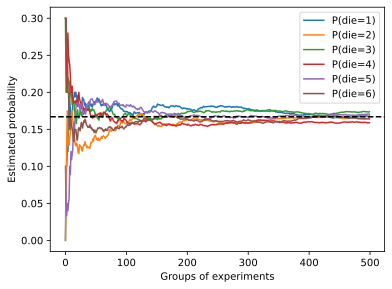

In [25]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True )

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label = ("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color="black", linestyle="dashed")
d2l.plt.gca().set_xlabel("Groups of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend();

# 处理多个随机变量